# Modeling

In [1]:
# load libraries

import numpy as np
import pandas as pd
import geopandas as gpd

from matplotlib import pyplot as plt
%matplotlib inline
import altair as alt

from sklearn.cluster import KMeans, dbscan 
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
plt.rcParams['figure.figsize'] = (10,6)

alt.renderers.enable("notebook")
np.random.seed(42)

In [3]:
path_data = './data/data_101219.geojson'

data = gpd.read_file(path_data)

### Aqueduct attributes for clustering

Baseline water stress: bws_raw  
Baseline water depletion: bwd_raw  
Interannual variability: iav_raw  
Seasonal variability: sev_raw  
Groundwater table decline: gtd_raw  
Riverine flood risk: rfr_raw  
Coastal flood risk: cfr_raw  
Drought risk: drr_raw  
Untreated connected wastewater: ucw_raw  
Unimproved/no drinking water: udw_raw  
Unimproved/no sanitation: usa_raw  

In [4]:
pd.set_option('display.max_columns', None)
data.head(1)

,string_id,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density,geometry
0,111011-EGY.11_1-3365,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.6139,0.01057,0.023176,34.693151,2.522154,0.0,(POLYGON ((31.90590570688292 29.85788702426048...


# Create Pipeline

1. Imputation option for missing data: https://scikit-learn.org/stable/modules/impute.html
1. Standard scaler
1. kmeans
1. optimize K using elbow method: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
1. generate final clusters
1. join clusters back to original data (unscaled)
1. summarise means for each group
1. describe group typologies

In [5]:
kmeans = KMeans(n_clusters=5)

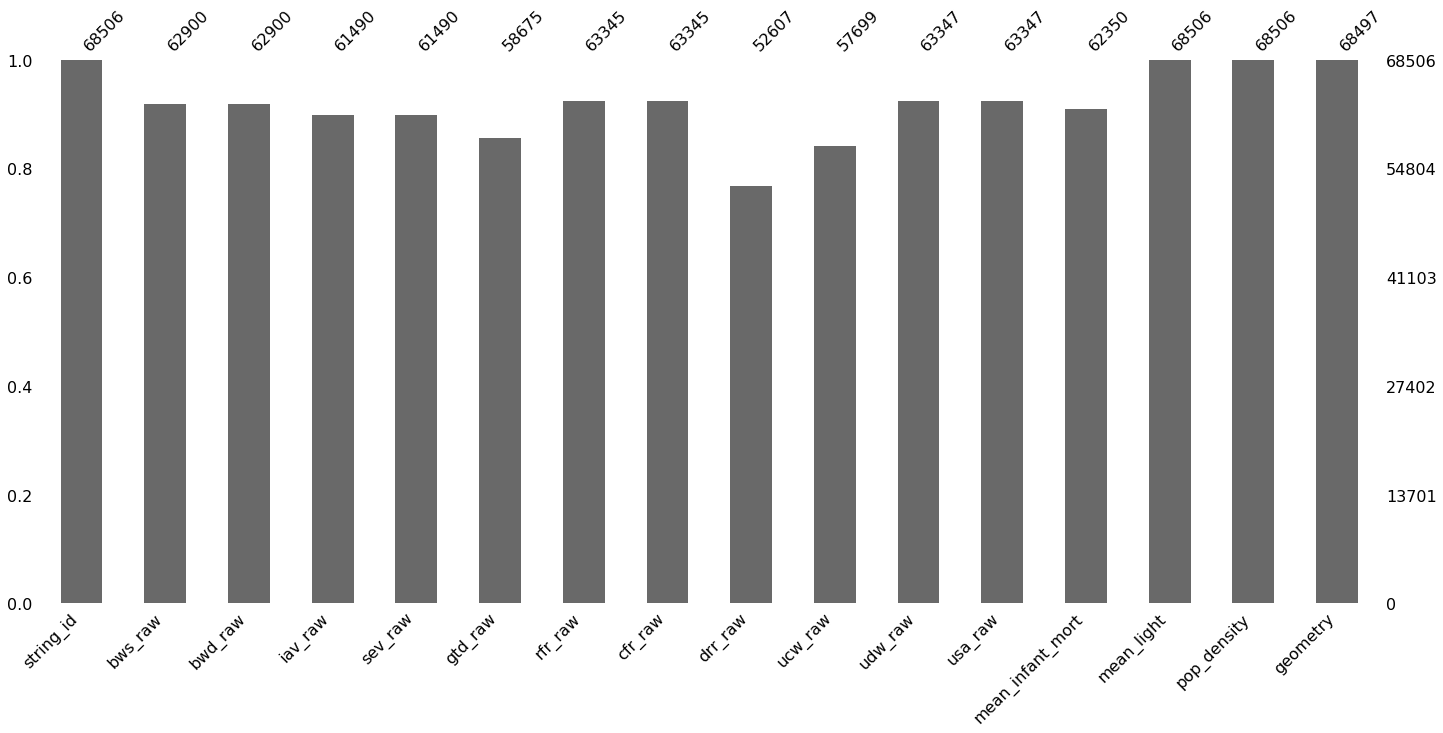

In [6]:
import missingno as msno
msno.bar(data)

## Using the iterativeimputer to fill NAs. Note: This is an experimental tool.

In [7]:
fill_NA = IterativeImputer(max_iter=10, random_state=0)

In [8]:
data_nostring = data.drop(['string_id', 'geometry'], axis=1)

In [10]:
data_nostring

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
0,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.613900,0.01057,0.023176,34.693151,2.522154,0.000000
1,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.613900,0.01057,0.023176,14.868493,13.672038,1506.964639
2,2.318042,0.987061,1.035414,0.962396,NaN,0.074383,0.0,NaN,0.613900,0.01057,0.023176,14.868493,36.785975,12130.427165
3,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,NaN,0.01057,0.023176,14.868493,35.409092,0.000000
4,2.318042,0.987061,1.035414,0.962396,NaN,0.074383,0.0,NaN,NaN,0.01057,0.023176,14.868493,38.731335,932.199402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995347,NaN,NaN,NaN,0.283582,0.000000
68502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.601600,NaN,NaN,NaN,0.000000,0.000000
68503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.601600,NaN,NaN,NaN,0.000000,0.000000
68504,NaN,NaN,NaN,NaN,0.000600,NaN,NaN,NaN,0.601600,NaN,NaN,NaN,0.000000,0.000000


In [11]:
fill_NA = fill_NA.fit(data_nostring)

In [12]:
imputed_DF = pd.DataFrame(fill_NA.fit_transform(data_nostring))
imputed_DF.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,2.389308,0.6139,0.01057,0.023176,34.693151,2.522154,0.0


In [13]:
imputed_DF.shape

(68506, 14)

In [14]:
col_names = list(data_nostring.columns)
col_names

['bws_raw',
 'bwd_raw',
 'iav_raw',
 'sev_raw',
 'gtd_raw',
 'rfr_raw',
 'cfr_raw',
 'drr_raw',
 'ucw_raw',
 'udw_raw',
 'usa_raw',
 'mean_infant_mort',
 'mean_light',
 'pop_density']

In [15]:
imputed_DF.columns = col_names
imputed_DF

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
0,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.000000,2.389308,0.613900,0.010570,0.023176,34.693151,2.522154,0.000000
1,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.000000,2.405378,0.613900,0.010570,0.023176,14.868493,13.672038,1506.964639
2,2.318042,0.987061,1.035414,0.962396,0.595716,0.074383,0.000000,2.765756,0.613900,0.010570,0.023176,14.868493,36.785975,12130.427165
3,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.000000,2.739219,0.349931,0.010570,0.023176,14.868493,35.409092,0.000000
4,2.318042,0.987061,1.035414,0.962396,0.570087,0.074383,0.000000,2.755900,0.336348,0.010570,0.023176,14.868493,38.731335,932.199402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68501,0.263783,0.183694,0.623765,0.710186,0.114734,0.009384,0.000743,2.263799,0.995347,0.099246,0.234813,19.450593,0.283582,0.000000
68502,0.263844,0.199067,0.613915,0.691059,0.086624,0.009516,0.000681,2.223124,0.601600,0.105343,0.227844,20.762890,0.000000,0.000000
68503,0.263844,0.199067,0.613915,0.691059,0.086624,0.009516,0.000681,2.223124,0.601600,0.105343,0.227844,20.762890,0.000000,0.000000
68504,0.263836,0.198916,0.613931,0.690648,0.000600,0.009529,0.000677,2.216331,0.601600,0.105252,0.227229,20.707165,0.000000,0.000000


## Physical Risk Variables cluster

In [16]:
physical_risk_cols = ['ucw_raw', 'udw_raw', 'usa_raw', 'mean_infant_mort', 'mean_light', 'pop_density']
physical_risk = imputed_DF[physical_risk_cols].copy()
physical_risk.head()

,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
0,0.613900,0.01057,0.023176,34.693151,2.522154,0.000000
1,0.613900,0.01057,0.023176,14.868493,13.672038,1506.964639
2,0.613900,0.01057,0.023176,14.868493,36.785975,12130.427165
3,0.349931,0.01057,0.023176,14.868493,35.409092,0.000000
4,0.336348,0.01057,0.023176,14.868493,38.731335,932.199402


In [17]:
scaler = StandardScaler()

In [18]:
physical_risk_scaled = scaler.fit_transform(physical_risk)
physical_risk_scaled

array([[ 0.33189974, -0.6223355 , -0.75911379,  0.6309712 , -0.07425985,
        -0.11562843],
       [ 0.33189974, -0.6223355 , -0.75911379, -0.29184516,  1.23082481,
         0.02767885],
       [ 0.33189974, -0.6223355 , -0.75911379, -0.29184516,  3.93629174,
         1.03793449],
       ...,
       [ 0.31273579, -0.00779948,  0.02388803, -0.01746737, -0.36947586,
        -0.11562843],
       [ 0.31273579, -0.00838594,  0.02153729, -0.0200613 , -0.36947586,
        -0.11562843],
       [ 0.31273579, -0.00779948,  0.02388803, -0.01746737, -0.36947586,
        -0.11562843]])

In [19]:
kmeans.fit(physical_risk_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
kmeans.labels_

array([0, 0, 3, ..., 0, 0, 0])

In [21]:
data['PR_labels'] = kmeans.labels_
data.head(1)

,string_id,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density,geometry,PR_labels
0,111011-EGY.11_1-3365,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.6139,0.01057,0.023176,34.693151,2.522154,0.0,(POLYGON ((31.90590570688292 29.85788702426048...,0


In [23]:
data.groupby('PR_labels').size()

PR_labels
0    50662
1     8256
2     6412
3     3128
4       48
dtype: int64